# Homework 2 - Pablo Leyva

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:

def build_system(n, f=lambda x: np.zeros_like(x), alpha=0.0, beta=0.0, L=0.0, R=1.0):
    """
    Builds the tridiagonal matrix A and RHS vector b for -y'' = f(x),
    with Dirichlet BCs y(L)=alpha, y(R)=beta.
    """
    h = (R - L) / n
    x = np.linspace(L, R, n + 1)

    N = n - 1
    A = np.zeros((N, N))
    b = f(x[1:-1])

    # Fill tridiagonal entries
    diag = 2.0 * np.ones(N)
    off = -1.0 * np.ones(N - 1)
    A += np.diag(diag) + np.diag(off, 1) + np.diag(off, -1)
    A /= h**2

    # Dirichlet BC adjustments
    b[0]  += alpha / h**2
    b[-1] += beta  / h**2

    return x, A, b, h

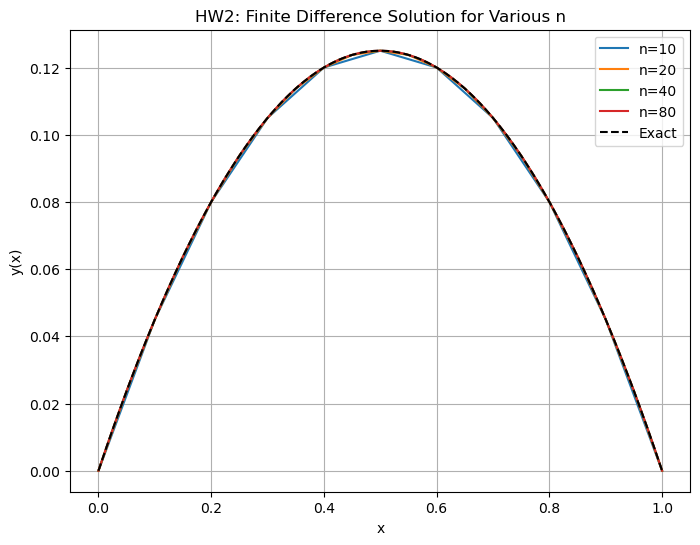

In [3]:
def exact_solution(x):
    # Example exact solution: y(x) = x*(1 - x)/2  ⇒ -y'' = 1
    return x*(1 - x)/2

f = lambda x: np.ones_like(x)  # -y'' = 1

plt.figure(figsize=(8,6))
for n in [10, 20, 40, 80]:
    x, A, b, h = build_system(n, f=f, alpha=0, beta=0)
    y_inner = np.linalg.solve(A, b)
    y = np.zeros_like(x)
    y[1:-1] = y_inner
    plt.plot(x, y, label=f'n={n}')

# Plot exact solution
x_fine = np.linspace(0,1,500)
plt.plot(x_fine, exact_solution(x_fine), 'k--', label='Exact')

plt.title('HW2: Finite Difference Solution for Various n')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid(True)
plt.show()